In [1]:
# change kernel to testmsnoise /home/yongki/.local/share/jupyter/kernels/testmsnoise
# Example 10-days-data from BW Network: ALTM and NORI station

# Working directory and initial data: 
# /bavaria/data
# /bavaria/Using MSNoise TEST.ipynb

## 1. Initialize database (sqlite)  
`msnoise db init --tech 1`  
will create 
    - /bavaria/db.ini
    - /bavaria/msnoise.sqlite

## 2. Setting up some parameters
    - `msnoise admin`
    - Input station information
    - Input filter configuration
        - f.low = 0.01 
        - f.mwcs_low = 0.12
        - f.high = 1.0
        - f.mwcs_high = 0.98
        - f.rms_threshold = 0
        - f.mwcs_wlen = 10
        - f.mwcs_step = 5
        - f.used = True
    - Configuration
        - data_folder = /home/yongki/D/IMGW/msnoise/bavaria/data/ 
        - data_structure = PDF
        - network   = BW
        - startdate = 2018-01-01
        - enddate 	= 2018-01-10 
        - ref_begin = 2018-01-01
        - ref_end 	= 2018-01-10
        - overlap 	= 0.5 
        - mov_stack = 1,5,10 

In [2]:
## 3. Connect to Database

from msnoise.api import connect
db = connect()

In [4]:
## 4. Scan Archive

from msnoise.s01scan_archive import main
main(init=True, threads=1)

2020-07-09 15:10:13.020341 msnoise [pid 19173][DEBUG]: scanning dir /home/yongki/D/IMGW/msnoise/bavaria/data/2018/ALTM/EHZ.D
2020-07-09 15:10:13.021420 msnoise [pid 19173][DEBUG]: Found 10 files in /home/yongki/D/IMGW/msnoise/bavaria/data/2018/ALTM/EHZ.D
2020-07-09 15:10:29.702018 msnoise [pid 19173][INFO]: /home/yongki/D/IMGW/msnoise/bavaria/data/2018/ALTM/EHZ.D: Added 10 | Modified 0 | Unchanged 0
2020-07-09 15:10:29.703423 msnoise [pid 19173][DEBUG]: scanning dir /home/yongki/D/IMGW/msnoise/bavaria/data/2018/NORI/EHZ.D
2020-07-09 15:10:29.704752 msnoise [pid 19173][DEBUG]: Found 10 files in /home/yongki/D/IMGW/msnoise/bavaria/data/2018/NORI/EHZ.D
2020-07-09 15:10:48.942531 msnoise [pid 19173][INFO]: /home/yongki/D/IMGW/msnoise/bavaria/data/2018/NORI/EHZ.D: Added 10 | Modified 0 | Unchanged 0
2020-07-09 15:10:48.943927 msnoise [pid 19173][INFO]: *** Finished: Scan Archive ***
2020-07-09 15:10:48.945080 msnoise [pid 19173][INFO]: It took 35.94 seconds


In [5]:
## 5. New Jobs

from msnoise.s02new_jobs import main
main()

2020-07-09 15:11:44.482404 msnoise [pid 19173][INFO]: *** Starting: New Jobs ***
2020-07-09 15:11:44.545794 msnoise [pid 19173][DEBUG]: Checking plugins' entry points
2020-07-09 15:11:44.547477 msnoise [pid 19173][DEBUG]: components_to_compute is populated, creating cross-station CC jobs
2020-07-09 15:11:44.548025 msnoise [pid 19173][INFO]: Scanning New/Modified files
2020-07-09 15:11:44.762161 msnoise [pid 19173][INFO]: Determining available data for each "updated date"
2020-07-09 15:11:44.776674 msnoise [pid 19173][DEBUG]: Inserting/Updating 10 jobs
2020-07-09 15:11:45.357383 msnoise [pid 19173][INFO]: Inserted 10 jobs
2020-07-09 15:11:45.358187 msnoise [pid 19173][INFO]: *** Finished: New Jobs ***


10

In [6]:
# 6. Compute CC
# The codes will do: lowpass 8 Hz, highpass 0.01 Hz, downsample to 20 Hz
# and compute CC from day 1 to 10
# Results in 10 data under /bavaria/STACKS/01/001_DAYS/ZZ/BW_ALTM_BW_NORI/*.MSEED

from msnoise.s03compute_no_rotation import main
main()

2020-07-09 15:13:36.996435 msnoise [pid 19173][INFO]: *** Starting: Compute CC ***
2020-07-09 15:13:37.052604 msnoise [pid 19173][INFO]: Will compute [ZZ] for different stations
2020-07-09 15:13:37.053590 msnoise [pid 19173][INFO]: Will compute [] for single stations
2020-07-09 15:13:37.054272 msnoise [pid 19173][INFO]: Checking if there are jobs to do
2020-07-09 15:13:37.058822 msnoise [pid 19173][INFO]: Getting the next job
2020-07-09 15:13:37.170126 msnoise [pid 19173][INFO]: New CC Job: 2018-01-01 (1 pairs with 2 stations)
2020-07-09 15:13:37.176434 msnoise [pid 19173][DEBUG]: BW.ALTM.Z Reading 1 Files


/home/yongki/anaconda3/envs/testmsnoise/lib/python3.7/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


2020-07-09 15:13:40.749352 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Checking sample alignment
2020-07-09 15:13:53.986443 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Checking Gaps
2020-07-09 15:14:22.105191 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Highpass at 0.01 Hz
2020-07-09 15:14:23.047586 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Lowpass at 8.00 Hz
2020-07-09 15:14:23.658535 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Downsample to 20.0 Hz
2020-07-09 15:14:25.536255 msnoise [pid 19173][DEBUG]: BW.NORI.Z Reading 1 Files
2020-07-09 15:14:33.634775 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Checking sample alignment
2020-07-09 15:14:33.635565 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Checking Gaps
2020-07-09 15:16:06.531896 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Highpass at 0.01 Hz
2020-07-09 15:16:08.427321 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Lowpass at 8.00 Hz
2020-07-09 15:16:09.027540 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Downsample to 20.0 Hz
2020-07-09 15:16:10.790211 msnoise [p

2020-07-09 15:16:12.853193 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T14:30:01.000000Z - 2018-01-01T15:00:01.000000Z
2020-07-09 15:16:12.868843 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T14:45:01.000000Z - 2018-01-01T15:15:01.000000Z
2020-07-09 15:16:12.885444 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T15:00:01.000000Z - 2018-01-01T15:30:01.000000Z
2020-07-09 15:16:12.901756 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T15:15:01.000000Z - 2018-01-01T15:45:01.000000Z
2020-07-09 15:16:12.919141 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T15:30:01.000000Z - 2018-01-01T16:00:01.000000Z
2020-07-09 15:16:12.937401 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T15:45:01.000000Z - 2018-01-01T16:15:01.000000Z
2020-07-09 15:16:12.953923 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T16:00:01.000000Z - 2018-01-01T16:30:01.000000Z
2020-07-09 15:16:12.970159 msnoise [pid 19173][DEBUG]: Processing 2018-01-01T16:15:01.000000Z - 2018-01-01T16:45:01.000000Z
2020-07-

2020-07-09 15:16:36.268145 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T04:15:01.000000Z - 2018-01-02T04:45:01.000000Z
2020-07-09 15:16:36.286356 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T04:30:01.000000Z - 2018-01-02T05:00:01.000000Z
2020-07-09 15:16:36.302873 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T04:45:01.000000Z - 2018-01-02T05:15:01.000000Z
2020-07-09 15:16:36.319642 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T05:00:01.000000Z - 2018-01-02T05:30:01.000000Z
2020-07-09 15:16:36.336740 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T05:15:01.000000Z - 2018-01-02T05:45:01.000000Z
2020-07-09 15:16:36.355870 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T05:30:01.000000Z - 2018-01-02T06:00:01.000000Z
2020-07-09 15:16:36.373641 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T05:45:01.000000Z - 2018-01-02T06:15:01.000000Z
2020-07-09 15:16:36.397055 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T06:00:01.000000Z - 2018-01-02T06:30:01.000000Z
2020-07-

2020-07-09 15:16:37.502851 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T21:00:01.000000Z - 2018-01-02T21:30:01.000000Z
2020-07-09 15:16:37.524388 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T21:15:01.000000Z - 2018-01-02T21:45:01.000000Z
2020-07-09 15:16:37.540911 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T21:30:01.000000Z - 2018-01-02T22:00:01.000000Z
2020-07-09 15:16:37.558484 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T21:45:01.000000Z - 2018-01-02T22:15:01.000000Z
2020-07-09 15:16:37.574086 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T22:00:01.000000Z - 2018-01-02T22:30:01.000000Z
2020-07-09 15:16:37.592383 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T22:15:01.000000Z - 2018-01-02T22:45:01.000000Z
2020-07-09 15:16:37.616155 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T22:30:01.000000Z - 2018-01-02T23:00:01.000000Z
2020-07-09 15:16:37.640009 msnoise [pid 19173][DEBUG]: Processing 2018-01-02T22:45:01.000000Z - 2018-01-02T23:15:01.000000Z
2020-07-

2020-07-09 15:16:53.168427 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T10:45:01.000000Z - 2018-01-03T11:15:01.000000Z
2020-07-09 15:16:53.187876 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T11:00:01.000000Z - 2018-01-03T11:30:01.000000Z
2020-07-09 15:16:53.205242 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T11:15:01.000000Z - 2018-01-03T11:45:01.000000Z
2020-07-09 15:16:53.221870 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T11:30:01.000000Z - 2018-01-03T12:00:01.000000Z
2020-07-09 15:16:53.239679 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T11:45:01.000000Z - 2018-01-03T12:15:01.000000Z
2020-07-09 15:16:53.257232 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T12:00:01.000000Z - 2018-01-03T12:30:01.000000Z
2020-07-09 15:16:53.273462 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T12:15:01.000000Z - 2018-01-03T12:45:01.000000Z
2020-07-09 15:16:53.292513 msnoise [pid 19173][DEBUG]: Processing 2018-01-03T12:30:01.000000Z - 2018-01-03T13:00:01.000000Z
2020-07-

2020-07-09 15:17:12.046816 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T01:00:01.000000Z - 2018-01-04T01:30:01.000000Z
2020-07-09 15:17:12.066421 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T01:15:01.000000Z - 2018-01-04T01:45:01.000000Z
2020-07-09 15:17:12.082477 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T01:30:01.000000Z - 2018-01-04T02:00:01.000000Z
2020-07-09 15:17:12.098978 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T01:45:01.000000Z - 2018-01-04T02:15:01.000000Z
2020-07-09 15:17:12.115099 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T02:00:01.000000Z - 2018-01-04T02:30:01.000000Z
2020-07-09 15:17:12.131683 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T02:15:01.000000Z - 2018-01-04T02:45:01.000000Z
2020-07-09 15:17:12.147972 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T02:30:01.000000Z - 2018-01-04T03:00:01.000000Z
2020-07-09 15:17:12.166900 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T02:45:01.000000Z - 2018-01-04T03:15:01.000000Z
2020-07-

2020-07-09 15:17:13.239171 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T17:45:01.000000Z - 2018-01-04T18:15:01.000000Z
2020-07-09 15:17:13.258603 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T18:00:01.000000Z - 2018-01-04T18:30:01.000000Z
2020-07-09 15:17:13.276339 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T18:15:01.000000Z - 2018-01-04T18:45:01.000000Z
2020-07-09 15:17:13.293832 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T18:30:01.000000Z - 2018-01-04T19:00:01.000000Z
2020-07-09 15:17:13.311586 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T18:45:01.000000Z - 2018-01-04T19:15:01.000000Z
2020-07-09 15:17:13.331946 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T19:00:01.000000Z - 2018-01-04T19:30:01.000000Z
2020-07-09 15:17:13.349307 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T19:15:01.000000Z - 2018-01-04T19:45:01.000000Z
2020-07-09 15:17:13.366813 msnoise [pid 19173][DEBUG]: Processing 2018-01-04T19:30:01.000000Z - 2018-01-04T20:00:01.000000Z
2020-07-

2020-07-09 15:17:36.838889 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T07:30:01.000000Z - 2018-01-05T08:00:01.000000Z
2020-07-09 15:17:36.858087 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T07:45:01.000000Z - 2018-01-05T08:15:01.000000Z
2020-07-09 15:17:36.876915 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T08:00:01.000000Z - 2018-01-05T08:30:01.000000Z
2020-07-09 15:17:36.894261 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T08:15:01.000000Z - 2018-01-05T08:45:01.000000Z
2020-07-09 15:17:36.912171 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T08:30:01.000000Z - 2018-01-05T09:00:01.000000Z
2020-07-09 15:17:36.928969 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T08:45:01.000000Z - 2018-01-05T09:15:01.000000Z
2020-07-09 15:17:36.946972 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T09:00:01.000000Z - 2018-01-05T09:30:01.000000Z
2020-07-09 15:17:36.964128 msnoise [pid 19173][DEBUG]: Processing 2018-01-05T09:15:01.000000Z - 2018-01-05T09:45:01.000000Z
2020-07-

2020-07-09 15:17:38.205476 msnoise [pid 19173][INFO]: Getting the next job
2020-07-09 15:17:38.326311 msnoise [pid 19173][INFO]: New CC Job: 2018-01-06 (1 pairs with 2 stations)
2020-07-09 15:17:38.330890 msnoise [pid 19173][DEBUG]: BW.ALTM.Z Reading 1 Files
2020-07-09 15:17:41.228061 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Checking sample alignment
2020-07-09 15:17:41.228773 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Checking Gaps
2020-07-09 15:17:42.899729 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Highpass at 0.01 Hz
2020-07-09 15:17:43.297216 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Lowpass at 8.00 Hz
2020-07-09 15:17:43.903585 msnoise [pid 19173][DEBUG]: BW.ALTM..EHZ Downsample to 20.0 Hz
2020-07-09 15:17:45.423065 msnoise [pid 19173][DEBUG]: BW.NORI.Z Reading 1 Files
2020-07-09 15:17:47.941327 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Checking sample alignment
2020-07-09 15:17:47.942333 msnoise [pid 19173][DEBUG]: BW.NORI..EHZ Checking Gaps
2020-07-09 15:17:49.708741 msnoise [pid 191

2020-07-09 15:17:53.183980 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T14:00:01.000000Z - 2018-01-06T14:30:01.000000Z
2020-07-09 15:17:53.200165 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T14:15:01.000000Z - 2018-01-06T14:45:01.000000Z
2020-07-09 15:17:53.216057 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T14:30:01.000000Z - 2018-01-06T15:00:01.000000Z
2020-07-09 15:17:53.233180 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T14:45:01.000000Z - 2018-01-06T15:15:01.000000Z
2020-07-09 15:17:53.249908 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T15:00:01.000000Z - 2018-01-06T15:30:01.000000Z
2020-07-09 15:17:53.266315 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T15:15:01.000000Z - 2018-01-06T15:45:01.000000Z
2020-07-09 15:17:53.282373 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T15:30:01.000000Z - 2018-01-06T16:00:01.000000Z
2020-07-09 15:17:53.299449 msnoise [pid 19173][DEBUG]: Processing 2018-01-06T15:45:01.000000Z - 2018-01-06T16:15:01.000000Z
2020-07-

2020-07-09 15:18:18.083975 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T04:15:01.000000Z - 2018-01-07T04:45:01.000000Z
2020-07-09 15:18:18.101674 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T04:30:01.000000Z - 2018-01-07T05:00:01.000000Z
2020-07-09 15:18:18.120118 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T04:45:01.000000Z - 2018-01-07T05:15:01.000000Z
2020-07-09 15:18:18.137937 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T05:00:01.000000Z - 2018-01-07T05:30:01.000000Z
2020-07-09 15:18:18.154791 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T05:15:01.000000Z - 2018-01-07T05:45:01.000000Z
2020-07-09 15:18:18.171991 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T05:30:01.000000Z - 2018-01-07T06:00:01.000000Z
2020-07-09 15:18:18.190211 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T05:45:01.000000Z - 2018-01-07T06:15:01.000000Z
2020-07-09 15:18:18.208339 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T06:00:01.000000Z - 2018-01-07T06:30:01.000000Z
2020-07-

2020-07-09 15:18:19.300664 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T21:00:01.000000Z - 2018-01-07T21:30:01.000000Z
2020-07-09 15:18:19.319799 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T21:15:01.000000Z - 2018-01-07T21:45:01.000000Z
2020-07-09 15:18:19.337968 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T21:30:01.000000Z - 2018-01-07T22:00:01.000000Z
2020-07-09 15:18:19.357605 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T21:45:01.000000Z - 2018-01-07T22:15:01.000000Z
2020-07-09 15:18:19.375889 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T22:00:01.000000Z - 2018-01-07T22:30:01.000000Z
2020-07-09 15:18:19.393785 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T22:15:01.000000Z - 2018-01-07T22:45:01.000000Z
2020-07-09 15:18:19.411505 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T22:30:01.000000Z - 2018-01-07T23:00:01.000000Z
2020-07-09 15:18:19.428561 msnoise [pid 19173][DEBUG]: Processing 2018-01-07T22:45:01.000000Z - 2018-01-07T23:15:01.000000Z
2020-07-

2020-07-09 15:18:38.258265 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T10:45:01.000000Z - 2018-01-08T11:15:01.000000Z
2020-07-09 15:18:38.275437 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T11:00:01.000000Z - 2018-01-08T11:30:01.000000Z
2020-07-09 15:18:38.293294 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T11:15:01.000000Z - 2018-01-08T11:45:01.000000Z
2020-07-09 15:18:38.313796 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T11:30:01.000000Z - 2018-01-08T12:00:01.000000Z
2020-07-09 15:18:38.333998 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T11:45:01.000000Z - 2018-01-08T12:15:01.000000Z
2020-07-09 15:18:38.351690 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T12:00:01.000000Z - 2018-01-08T12:30:01.000000Z
2020-07-09 15:18:38.368942 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T12:15:01.000000Z - 2018-01-08T12:45:01.000000Z
2020-07-09 15:18:38.386128 msnoise [pid 19173][DEBUG]: Processing 2018-01-08T12:30:01.000000Z - 2018-01-08T13:00:01.000000Z
2020-07-

2020-07-09 15:18:56.750079 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T00:30:01.000000Z - 2018-01-09T01:00:01.000000Z
2020-07-09 15:18:56.768895 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T00:45:01.000000Z - 2018-01-09T01:15:01.000000Z
2020-07-09 15:18:56.790367 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T01:00:01.000000Z - 2018-01-09T01:30:01.000000Z
2020-07-09 15:18:56.810355 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T01:15:01.000000Z - 2018-01-09T01:45:01.000000Z
2020-07-09 15:18:56.829133 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T01:30:01.000000Z - 2018-01-09T02:00:01.000000Z
2020-07-09 15:18:56.846805 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T01:45:01.000000Z - 2018-01-09T02:15:01.000000Z
2020-07-09 15:18:56.864849 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T02:00:01.000000Z - 2018-01-09T02:30:01.000000Z
2020-07-09 15:18:56.886748 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T02:15:01.000000Z - 2018-01-09T02:45:01.000000Z
2020-07-

2020-07-09 15:18:57.976656 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T17:15:01.000000Z - 2018-01-09T17:45:01.000000Z
2020-07-09 15:18:57.993110 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T17:30:01.000000Z - 2018-01-09T18:00:01.000000Z
2020-07-09 15:18:58.009629 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T17:45:01.000000Z - 2018-01-09T18:15:01.000000Z
2020-07-09 15:18:58.025754 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T18:00:01.000000Z - 2018-01-09T18:30:01.000000Z
2020-07-09 15:18:58.042872 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T18:15:01.000000Z - 2018-01-09T18:45:01.000000Z
2020-07-09 15:18:58.062513 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T18:30:01.000000Z - 2018-01-09T19:00:01.000000Z
2020-07-09 15:18:58.081235 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T18:45:01.000000Z - 2018-01-09T19:15:01.000000Z
2020-07-09 15:18:58.107073 msnoise [pid 19173][DEBUG]: Processing 2018-01-09T19:00:01.000000Z - 2018-01-09T19:30:01.000000Z
2020-07-

2020-07-09 15:19:17.356694 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T07:30:01.000000Z - 2018-01-10T08:00:01.000000Z
2020-07-09 15:19:17.373760 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T07:45:01.000000Z - 2018-01-10T08:15:01.000000Z
2020-07-09 15:19:17.391340 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T08:00:01.000000Z - 2018-01-10T08:30:01.000000Z
2020-07-09 15:19:17.409420 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T08:15:01.000000Z - 2018-01-10T08:45:01.000000Z
2020-07-09 15:19:17.425758 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T08:30:01.000000Z - 2018-01-10T09:00:01.000000Z
2020-07-09 15:19:17.442507 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T08:45:01.000000Z - 2018-01-10T09:15:01.000000Z
2020-07-09 15:19:17.461527 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T09:00:01.000000Z - 2018-01-10T09:30:01.000000Z
2020-07-09 15:19:17.478346 msnoise [pid 19173][DEBUG]: Processing 2018-01-10T09:15:01.000000Z - 2018-01-10T09:45:01.000000Z
2020-07-

In [7]:
# 7. Stacking
# 7.a. using reference function

# The export directory are "REF/" and "DAY%03i/" where %03i will be replaced by
# the number of days stacked together (DAYS_005 for a 5-days stack, e.g.).

# Results in a MSEED file under /bavaria/STACKS/01/REF/ZZ/BW_ALTM_BW_NORI.MSEED

from msnoise.s04stack import main

interval = 1.

# ref method
main('ref', interval)

2020-07-09 15:46:31.712335 msnoise [pid 19173][DEBUG]: Starting the ref stack
2020-07-09 15:46:32.465459 msnoise [pid 19173][INFO]: There are STACKS jobs for some days to recompute for BW.ALTM:BW.NORI
2020-07-09 15:46:32.468452 msnoise [pid 19173][DEBUG]: Processing BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:46:32.471532 msnoise [pid 19173][DEBUG]: New Data for BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:46:32.595706 msnoise [pid 19173][DEBUG]: Data loaded
2020-07-09 15:46:32.691219 msnoise [pid 19173][INFO]: You just finished REF stacking, remember to reset the STACK jobs if you need to compute a MOV stacks. Run 'msnoise reset STACK' when all process have finished.
2020-07-09 15:46:32.704621 msnoise [pid 19173][INFO]: The current STACK jobs have been intentionnaly left 'I'n progress so they can be reset.
2020-07-09 15:46:32.710937 msnoise [pid 19173][DEBUG]: Finished Stacking


In [9]:
# 7.b. using Moving-window stacks
# Results in 3 folders: /bavaria/STACKS/01/001_DAYS | /005_DAYS | /010_DAYS


# mov method
from msnoise.api import reset_jobs
reset_jobs(db, "STACK", alljobs=True)
main('mov', interval)

2020-07-09 15:51:35.666316 msnoise [pid 19173][DEBUG]: Starting the mov stack
2020-07-09 15:51:35.809799 msnoise [pid 19173][INFO]: There are STACKS jobs for some days to recompute for BW.ALTM:BW.NORI
2020-07-09 15:51:35.813059 msnoise [pid 19173][DEBUG]: Processing BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:51:35.814874 msnoise [pid 19173][DEBUG]: New Data for BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:51:35.833307 msnoise [pid 19173][DEBUG]: Data loaded
2020-07-09 15:51:35.834178 msnoise [pid 19173][DEBUG]: Mov Stack!
2020-07-09 15:51:35.834971 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-01 [2018-01-01 - 2018-01-01] (5 day stack)
2020-07-09 15:51:35.943435 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-01 [2018-01-01 - 2018-01-01] (10 day stack)
2020-07-09 15:51:35.951549 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-02 [2018-01-01 - 2018-01-02] (5 day stack)
2020-07-09 15:51:36.055864 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-02 [2018-01-01 - 2018-01-02] (10

In [10]:
# 7.c. step
# Results in 3 folders: /bavaria/STACKS/01/001_DAYS | /005_DAYS | /010_DAYS

reset_jobs(db, "STACK", alljobs=True)
# step method
main('step', interval)

2020-07-09 15:57:28.615609 msnoise [pid 19173][DEBUG]: Starting the step stack
2020-07-09 15:57:28.770326 msnoise [pid 19173][INFO]: There are STACKS jobs for some days to recompute for BW.ALTM:BW.NORI
2020-07-09 15:57:28.773198 msnoise [pid 19173][DEBUG]: Processing BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:57:28.774636 msnoise [pid 19173][DEBUG]: New Data for BW.ALTM:BW.NORI-ZZ-1
2020-07-09 15:57:28.799659 msnoise [pid 19173][DEBUG]: Data loaded
2020-07-09 15:57:28.801476 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-01 [2018-01-01 - 2018-01-05] (5 day stack)
2020-07-09 15:57:28.914665 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-06 [2018-01-01 - 2018-01-05] (5 day stack)
2020-07-09 15:57:29.025387 msnoise [pid 19173][DEBUG]: BW_ALTM_BW_NORI ZZ 2018-01-01 [2018-01-01 - 2018-01-10] (10 day stack)
2020-07-09 15:57:29.129380 msnoise [pid 19173][DEBUG]: Finished Stacking


In [11]:
# 8. Compute MWCS
# Will create MWCS folder 
# Results in 3 folders: /bavaria/MWCS/01/001_DAYS | /005_DAYS | /010_DAYS

from msnoise.s05compute_mwcs import main
main()

2020-07-09 15:59:16.351756 msnoise [pid 19173][INFO]: *** Starting: Compute MWCS ***
2020-07-09 15:59:16.405656 msnoise [pid 19173][DEBUG]: Ready to compute
2020-07-09 15:59:18.113429 msnoise [pid 19173][INFO]: There are MWCS jobs for some days to recompute for BW.ALTM:BW.NORI
2020-07-09 15:59:18.122589 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-01 - 01 days
2020-07-09 15:59:18.733442 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-01 - 05 days
2020-07-09 15:59:18.849242 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-01 - 10 days
2020-07-09 15:59:18.985584 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-02 - 01 days


/home/yongki/anaconda3/envs/testmsnoise/lib/python3.7/site-packages/msnoise/move2obspy.py:456: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / (1.0 / (coh[index_range] ** 2) - 1.0)
/home/yongki/anaconda3/envs/testmsnoise/lib/python3.7/site-packages/msnoise/move2obspy.py:456: RuntimeWarning: invalid value encountered in true_divide
  w = 1.0 / (1.0 / (coh[index_range] ** 2) - 1.0)


2020-07-09 15:59:19.118084 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-02 - 05 days
2020-07-09 15:59:19.260075 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-02 - 10 days
2020-07-09 15:59:19.416536 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-03 - 01 days
2020-07-09 15:59:19.551557 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-03 - 05 days
2020-07-09 15:59:19.666363 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-03 - 10 days
2020-07-09 15:59:19.778935 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-04 - 01 days
2020-07-09 15:59:19.894040 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-04 - 05 days
2020-07-09 15:59:20.016977 msnoise [pid 19173][DEBUG]: Processing MWCS for: BW_ALTM_BW_NORI.ZZ.01 - 2018-01-04 - 10 days
2020-07-09 15:59:20.166434 msnoi

In [12]:
# 9. Compute DTT
# Will create DTT folder 
# Results in 3 folders: /bavaria/DTT/01/001_DAYS | /005_DAYS | /010_DAYS

from msnoise.s06compute_dtt import main
main()

2020-07-09 16:01:14.540692 msnoise [pid 19173][INFO]: *** Starting: Compute DT/T ***
2020-07-09 16:01:14.864065 msnoise [pid 19173][INFO]: Loading mov=1 days for filter=01
2020-07-09 16:01:15.086275 msnoise [pid 19173][DEBUG]: 2018-01-01: exporting: 1 pairs
2020-07-09 16:01:15.145085 msnoise [pid 19173][INFO]: Loading mov=5 days for filter=01
2020-07-09 16:01:15.152975 msnoise [pid 19173][DEBUG]: 2018-01-01: exporting: 1 pairs
2020-07-09 16:01:15.157184 msnoise [pid 19173][INFO]: Loading mov=10 days for filter=01
2020-07-09 16:01:15.171379 msnoise [pid 19173][DEBUG]: 2018-01-01: exporting: 1 pairs


/home/yongki/anaconda3/envs/testmsnoise/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/yongki/anaconda3/envs/testmsnoise/lib/python3.7/site-packages/msnoise/s06compute_dtt.py:359: RuntimeWarning: divide by zero encountered in true_divide
  w = 1.0 / errArray[i][index]


2020-07-09 16:01:15.395392 msnoise [pid 19173][INFO]: Loading mov=1 days for filter=01
2020-07-09 16:01:15.402840 msnoise [pid 19173][DEBUG]: 2018-01-02: exporting: 1 pairs
2020-07-09 16:01:15.407019 msnoise [pid 19173][INFO]: Loading mov=5 days for filter=01
2020-07-09 16:01:15.415660 msnoise [pid 19173][DEBUG]: 2018-01-02: exporting: 1 pairs
2020-07-09 16:01:15.421243 msnoise [pid 19173][INFO]: Loading mov=10 days for filter=01
2020-07-09 16:01:15.429528 msnoise [pid 19173][DEBUG]: 2018-01-02: exporting: 1 pairs
2020-07-09 16:01:15.672262 msnoise [pid 19173][INFO]: Loading mov=1 days for filter=01
2020-07-09 16:01:15.680154 msnoise [pid 19173][DEBUG]: 2018-01-03: exporting: 1 pairs
2020-07-09 16:01:15.683173 msnoise [pid 19173][INFO]: Loading mov=5 days for filter=01
2020-07-09 16:01:15.691279 msnoise [pid 19173][DEBUG]: 2018-01-03: exporting: 1 pairs
2020-07-09 16:01:15.695434 msnoise [pid 19173][INFO]: Loading mov=10 days for filter=01
2020-07-09 16:01:15.705391 msnoise [pid 19173]

New Data for BW_ALTM:BW_NORI-ZZ-1-1
output to: ccftime BW_ALTM-BW_NORI-ZZ-f1-m1.png


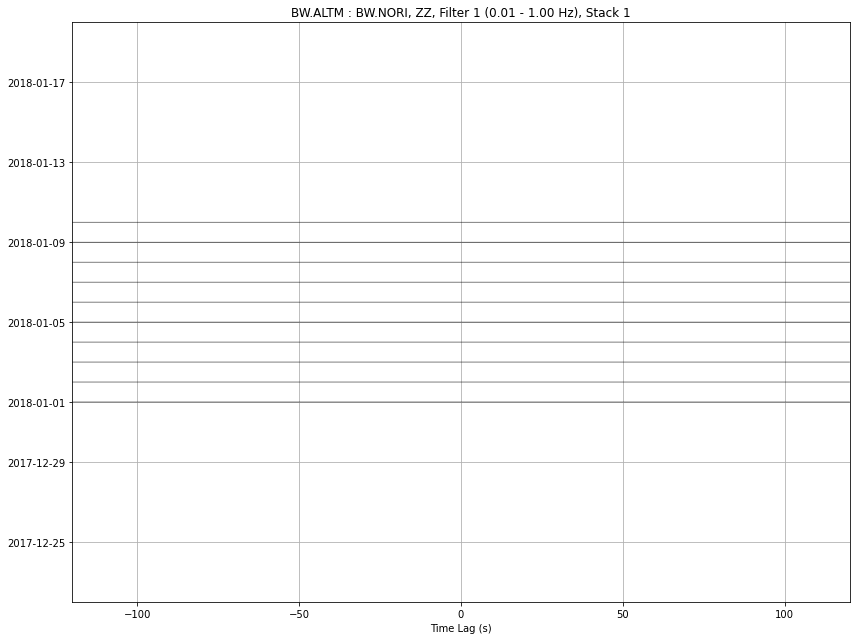

In [14]:
# 10. PLOTTING
# 10.a. Plot cross-correlation functions (CCF) vs time

from msnoise.api import get_station_pairs, get_filters
from msnoise.plots.ccftime import main

for sta1, sta2 in get_station_pairs(db):
    sta1 = "%s.%s" % (sta1.net, sta1.sta)
    sta2 = "%s.%s" % (sta2.net, sta2.sta)
    for filter in get_filters(db):
        main(sta1, sta2, filter.ref, "ZZ",  1, show=True,
             outfile="?.png")
        fn = 'ccftime %s-%s-f%i-m%i.png' % \
        ("%s-%s" % (sta1.replace(".", "_"),
                    sta2.replace(".", "_")),
         "ZZ", filter.ref, 1)

New Data for BW_ALTM:BW_NORI-ZZ-1-1
output to: interferogram BW_ALTM-BW_NORI-ZZ-f1-m1.png


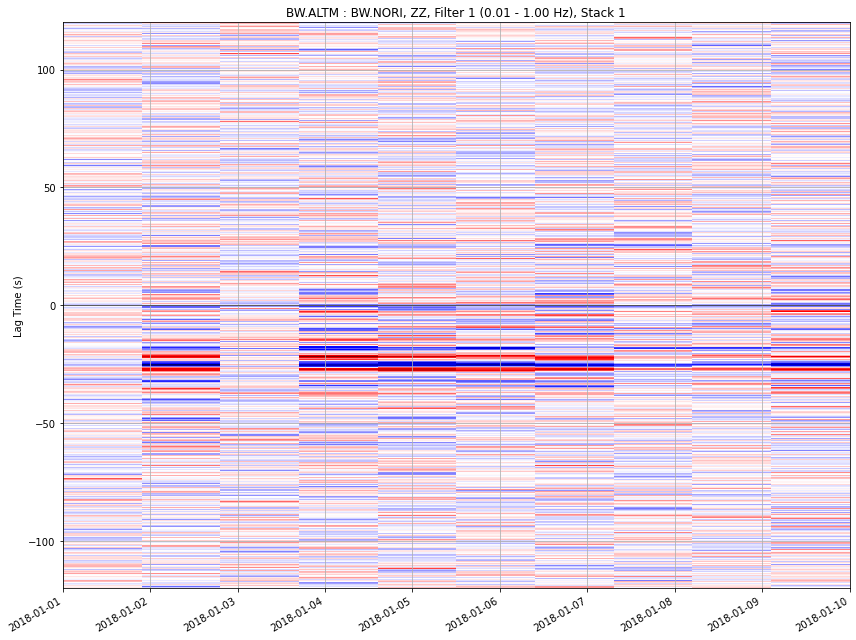

In [15]:
# 10.b. Plot interferogram

from msnoise.plots.interferogram import main

for sta1, sta2 in get_station_pairs(db):
    sta1 = "%s.%s" % (sta1.net, sta1.sta)
    sta2 = "%s.%s" % (sta2.net, sta2.sta)
    for filter in get_filters(db):
        main(sta1, sta2, filter.ref, "ZZ",  1, show=True,
             outfile="?.png")
        fn = 'interferogram %s-%s-f%i-m%i.png' % \
        ("%s-%s" % (sta1.replace(".", "_"),
                    sta2.replace(".", "_")),
         "ZZ", filter.ref, 1)

New Data for BW_ALTM:BW_NORI-ZZ-1-1
?.png
output to: spectimeBW_ALTM-BW_NORI-ZZ-f1-m1.png


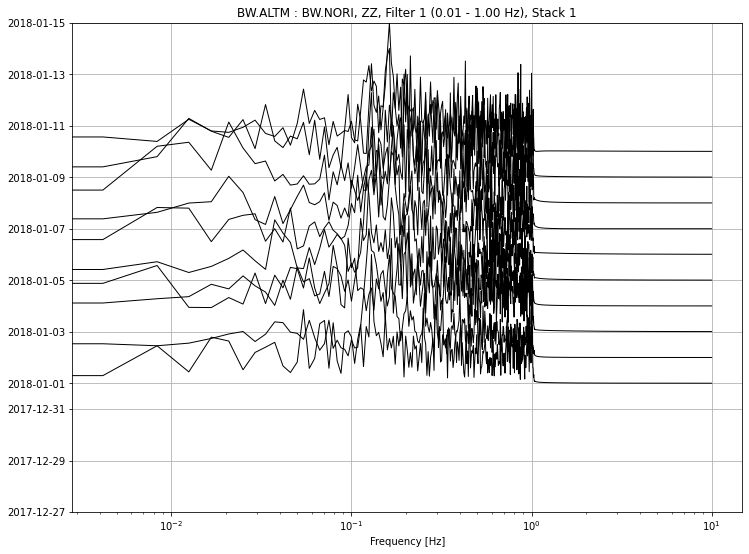

In [17]:
# 10.c. Plot spectime

from msnoise.plots.spectime import main

for sta1, sta2 in get_station_pairs(db):
    sta1 = "%s.%s" % (sta1.net, sta1.sta)
    sta2 = "%s.%s" % (sta2.net, sta2.sta)
    for filter in get_filters(db):
        main(sta1, sta2, filter.ref, "ZZ", 1, show=True,
             outfile="?.png")
        fn = 'ccftime %s-%s-f%i-m%i.png' % \
        ("%s-%s" % (sta1.replace(".", "_"),
                    sta2.replace(".", "_")),
         "ZZ", filter.ref, 1)

BW.ALTM:BW.NORI 103.4496432242035
output to: distance ZZ-f1.png


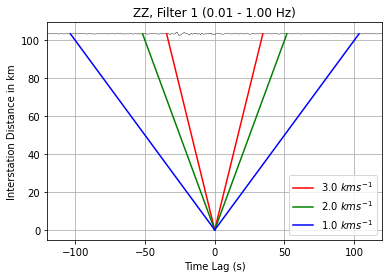

BW.ALTM:BW.NORI 103.4496432242035
output to: distance ZZ-f1_refilter.png


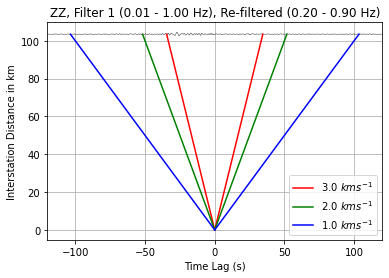

In [18]:
# 10.d.Plot distance

from msnoise.plots.distance import main

main(filterid=1, components="ZZ", show=True, outfile="?.png")
fn = "distance ZZ-f1.png"

main(filterid=1, components="ZZ", show=True, outfile="?_refilter.png",
     refilter="0.2:0.9")
fn = "distance ZZ-f1_refilter.png"

New Data for BW_ALTM_BW_NORI-ZZ-1-5
47
<class 'pandas.core.frame.DataFrame'>
t             -115.0    -110.0    -105.0    -100.0    -95.0     -90.0   \
2018-01-01  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-02  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-03  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-04  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-05  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-06  0.002735  0.010668 -0.044761  0.050242 -0.067412 -0.004420   
2018-01-07 -0.044330  0.420253 -0.245020  0.075469 -0.076874  1.060121   
2018-01-08 -0.108636 -0.078339 -0.234305  0.094373  0.050458  0.089344   
2018-01-09 -0.059904 -0.039386  0.058519  1.124633  0.035216  0.070048   
2018-01-10 -0.038198 -0.019438  0.086898 -0.019054 -1.229923  0.006800   

t             -85.0     -80.0     -75.0     -70.0   ...     70.0      75.0   \
2018-01-01  0.401522  0.02538

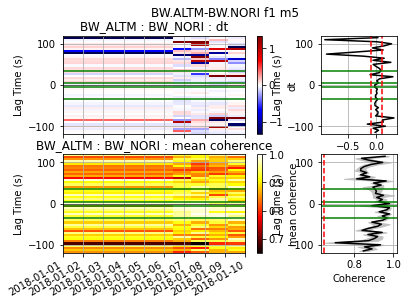

In [19]:
# 10.e. Plot MWCS
from msnoise.plots.mwcs import main
main(sta1, sta2, filterid=1, components="ZZ",
     mov_stack=5, show=True, outfile="?.png")
fn = "mwcs YA_UV05_YA_UV06-ZZ-f1-m5.png"